# This is the start of my great big #SoDS2017 data project. Since I'm a big baseball fan, I am going to use MLB statistics data to practice data science skills, and who knows - maybe I find something useful too! 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

print(pd.__version__)
print(np.__version__)

0.19.2
1.11.3


In [2]:
batting = pd.read_csv('./Lahman-2016/core/Batting.csv')

In [3]:
batting.head(10)

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN
5,armstbo01,1871,1,FW1,NaN,12,49,9,11,2,...,5.0,0.0,1.0,0,1.0,NaN,NaN,NaN,NaN,NaN
6,barkeal01,1871,1,RC1,NaN,1,4,0,1,0,...,2.0,0.0,0.0,1,0.0,NaN,NaN,NaN,NaN,NaN
7,barnero01,1871,1,BS1,NaN,31,157,66,63,10,...,34.0,11.0,6.0,13,1.0,NaN,NaN,NaN,NaN,NaN
8,barrebi01,1871,1,FW1,NaN,1,5,1,1,1,...,1.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
9,barrofr01,1871,1,BS1,NaN,18,86,13,13,2,...,11.0,1.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN


In [4]:
batting.isnull().sum()

playerID        0
yearID          0
stint           0
teamID          0
lgID          737
G               0
AB              0
R               0
H               0
2B              0
3B              0
HR              0
RBI           424
SB           1300
CS          23456
BB              0
SO           7838
IBB         36565
HBP          2810
SH           6338
SF          36034
GIDP        26110
dtype: int64

In [5]:
batting.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102392.000000,101516.000000,79360.000000,102816.000000,94978.000000,66251.000000,100006.000000,96478.000000,66782.000000,76706.000000
mean,1964.262313,1.077838,51.343439,141.905511,18.815544,37.139930,6.289167,1.293252,2.813599,17.003975,2.976821,1.226008,13.067207,20.529712,1.105870,1.056057,2.299540,1.054101,2.981018
std,38.856297,0.284366,47.121658,184.654492,28.242983,52.603757,9.662468,2.645770,6.304919,26.352011,7.717174,2.747377,20.746460,28.328542,2.780187,2.276251,4.241095,1.961732,4.735153
min,1871.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1934.000000,1.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1973.000000,1.000000,34.000000,49.000000,4.000000,9.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,3.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1998.000000,1.000000,80.000000,231.000000,27.000000,58.000000,9.000000,1.000000,2.000000,24.000000,2.000000,1.000000,18.000000,29.000000,1.000000,1.000000,3.000000,1.000000,4.000000
max,2016.000000,5.000000,165.000000,716.000000,192.000000,262.000000,67.000000,36.000000,73.000000,191.000000,138.000000,42.000000,232.000000,223.000000,120.000000,51.000000,67.000000,19.000000,36.000000


So, it's not all squeaky clean data. There are nulls, so I have to try and determine what's going on there. 102,000+ lines of data - wow! I had no idea there could be that many players involved in one season. I wonder if that's also a sign that there might be some issues with the data? Let's find out, shall we?

In [6]:
batting.dtypes

playerID     object
yearID        int64
stint         int64
teamID       object
lgID         object
G             int64
AB            int64
R             int64
H             int64
2B            int64
3B            int64
HR            int64
RBI         float64
SB          float64
CS          float64
BB            int64
SO          float64
IBB         float64
HBP         float64
SH          float64
SF          float64
GIDP        float64
dtype: object

In [7]:
batting.stint.unique()

array([1, 2, 3, 4, 5])

#### Ohhhhh... I think I figured it out. This isn't just data from 2016, this is data from all baseball history... up to 2016! That makes a lot more sense as to why there are so many teams, so many player ids, etc. For now, I'll pull the data from 2016 only. 

In [8]:
batting_2016 = batting[batting['yearID'] == 2016]

In [9]:
batting_2016.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
101333,abadfe01,2016,1,MIN,AL,39,1,0,0,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
101334,abadfe01,2016,2,BOS,AL,18,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
101335,abreujo02,2016,1,CHA,AL,159,624,67,183,32,...,100.0,0.0,2.0,47,125.0,7.0,15.0,0.0,9.0,21.0
101336,achteaj01,2016,1,LAA,AL,27,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
101337,ackledu01,2016,1,NYA,AL,28,61,6,9,0,...,4.0,0.0,0.0,8,9.0,0.0,0.0,0.0,1.0,0.0


In [10]:
batting_2016.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,1483.0,1483.000000,1483.000000,1483.000000,1483.000000,1483.000000,1483.000000,1483.000000,1483.000000,1483.000000,1483.000000,1483.000000,1483.000000,1483.000000,1483.000000,1483.000000,1483.000000,1483.000000,1483.000000
mean,2016.0,1.092380,47.505732,111.639245,14.662171,28.507080,5.565745,0.588672,3.782873,13.988537,1.710722,0.674983,10.173972,26.285907,0.628456,1.113284,0.691167,0.818611,2.507755
std,0.0,0.307732,45.329076,177.929105,25.802684,48.619753,9.814760,1.444682,7.863979,25.425247,5.094313,1.697689,18.664036,40.847109,1.857668,2.498443,1.565173,1.691091,4.600553
min,2016.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.0,1.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016.0,1.000000,31.000000,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.0,1.000000,69.000000,155.000000,18.000000,36.000000,7.000000,0.000000,3.000000,15.500000,1.000000,0.000000,13.000000,38.000000,0.000000,1.000000,1.000000,1.000000,3.000000
max,2016.0,4.000000,162.000000,672.000000,123.000000,216.000000,48.000000,11.000000,47.000000,133.000000,62.000000,18.000000,116.000000,219.000000,20.000000,24.000000,13.000000,15.000000,26.000000


In [11]:
batting_2016.isnull().sum()

playerID    0
yearID      0
stint       0
teamID      0
lgID        0
G           0
AB          0
R           0
H           0
2B          0
3B          0
HR          0
RBI         0
SB          0
CS          0
BB          0
SO          0
IBB         0
HBP         0
SH          0
SF          0
GIDP        0
dtype: int64

Excellent! Now I have all of 2016's stats, and there are no NaN's to cause any issues at this point. So far, so good.

## Now, to perform some basic data analysis. I should create some boxplots, but how to group the data? Perhaps by team or league would be good to start. I can check out some of my other projects where I did simillar exploration. I then want to go on and recreate the empirical bayes study (including the chart) that I found. From there, I hope to get inspired to do some other digging on my own, and maybe even start a basic predictive model, looking for the most relevant stats (features). Decision tree / random forest maybe? 

In [12]:
#Combining player stats with multiple stints...
batting_2016 = batting_2016.groupby('playerID').sum().reset_index()

In [13]:
batting_2016.head()

,playerID,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abadfe01,4032,3,57,1,0,0,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
1,abreujo02,2016,1,159,624,67,183,32,1,25,100.0,0.0,2.0,47,125.0,7.0,15.0,0.0,9.0,21.0
2,achteaj01,2016,1,27,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,ackledu01,2016,1,28,61,6,9,0,0,0,4.0,0.0,0.0,8,9.0,0.0,0.0,0.0,1.0,0.0
4,adamecr01,2016,1,121,225,25,49,7,3,2,17.0,2.0,3.0,24,47.0,0.0,4.0,3.0,0.0,5.0


In [14]:
batting_2016.drop('stint', axis=1, inplace=True)

In [15]:
# Create a column for Batting Average
batting_2016['Avg'] = batting_2016.loc[:,'H'] / batting_2016.loc[:,'AB']

In [16]:
batting_2016.fillna(0, inplace=True)

In [17]:
batting_2016.head()

,playerID,yearID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,Avg
0,abadfe01,4032,57,1,0,0,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,abreujo02,2016,159,624,67,183,32,1,25,100.0,0.0,2.0,47,125.0,7.0,15.0,0.0,9.0,21.0,0.293269
2,achteaj01,2016,27,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,ackledu01,2016,28,61,6,9,0,0,0,4.0,0.0,0.0,8,9.0,0.0,0.0,0.0,1.0,0.0,0.147541
4,adamecr01,2016,121,225,25,49,7,3,2,17.0,2.0,3.0,24,47.0,0.0,4.0,3.0,0.0,5.0,0.217778


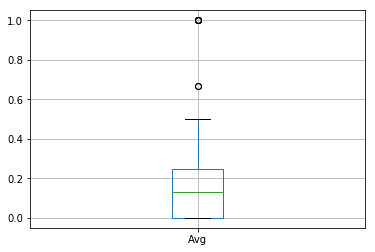

In [18]:
#Plot boxplot of batting averages for all players in 2016
plt.figure()
bp = batting_2016.boxplot(column='Avg')

### The data is skewed by those outliers of people batting 1.000 or .000. I'll pull out the batting average column and remove players with fewer than 75 (arbitrarily chosen) at-bats. But first, I need to squash the dataframe to combine players with multiple stints. This project is definitely forcing me to learn / re-learn pandas! 

In [19]:
batting_2016.columns

Index(['playerID', 'yearID', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI',
       'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP', 'Avg'],
      dtype='object')

In [20]:
Batting_trimmed = batting_2016[batting_2016['AB']>75]

The above cell trims out players who had fewer than 75 at bats in 2016. This should clean up the dataset, removing players whose averages will skew the data toward .000 or 1.000

In [21]:
Batting_trimmed.describe()

,yearID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,Avg
count,458.000000,458.000000,458.00000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000
mean,2200.873362,103.681223,340.09607,45.661572,88.602620,17.362445,1.825328,12.010917,43.711790,5.366812,2.109170,31.713974,77.454148,2.008734,3.467249,1.157205,2.561135,7.707424,0.251107
std,667.822856,40.118955,172.42656,28.464133,51.247964,10.808643,2.110734,10.332433,29.463843,8.203428,2.552958,21.778150,41.227541,2.926512,3.602214,1.819347,2.243780,5.510840,0.036098
min,2016.000000,26.000000,78.00000,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.094118
25%,2016.000000,70.000000,185.50000,21.000000,42.000000,8.000000,0.000000,4.000000,18.000000,0.000000,0.000000,15.000000,44.250000,0.000000,1.000000,0.000000,1.000000,3.000000,0.228339
50%,2016.000000,107.000000,325.50000,40.000000,81.500000,16.000000,1.000000,9.000000,37.000000,2.000000,1.000000,26.000000,70.000000,1.000000,3.000000,0.000000,2.000000,6.000000,0.253253
75%,2016.000000,141.000000,506.00000,67.000000,129.750000,25.000000,3.000000,18.000000,64.000000,7.000000,3.000000,44.000000,107.750000,3.000000,5.000000,2.000000,4.000000,11.000000,0.275112
max,8064.000000,162.000000,672.00000,123.000000,216.000000,48.000000,11.000000,47.000000,133.000000,62.000000,18.000000,116.000000,219.000000,20.000000,31.000000,11.000000,15.000000,26.000000,0.347826


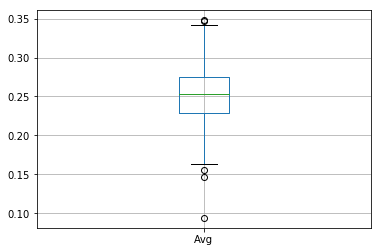

In [22]:
#Plot boxplot of batting averages for all players in 2016 with more than 75 at-bats
plt.figure()
bp = Batting_trimmed.boxplot(column='Avg')

### One thing to think about is adding or creating a dataframe with modern (SABR) stats like WOBA, WRC+, etc. The boxplot here looks way less noisy, thanks to trimming out small samples. I am satisfied and now want to move on to the empirical bayes part of this project! The example I'm following uses the entire batting dataset, so I will do the same. The above work will be useful for breaking down individual seasons, as well as serving as good practice!

In [23]:
batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN


In [24]:
batting.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102392.000000,101516.000000,79360.000000,102816.000000,94978.000000,66251.000000,100006.000000,96478.000000,66782.000000,76706.000000
mean,1964.262313,1.077838,51.343439,141.905511,18.815544,37.139930,6.289167,1.293252,2.813599,17.003975,2.976821,1.226008,13.067207,20.529712,1.105870,1.056057,2.299540,1.054101,2.981018
std,38.856297,0.284366,47.121658,184.654492,28.242983,52.603757,9.662468,2.645770,6.304919,26.352011,7.717174,2.747377,20.746460,28.328542,2.780187,2.276251,4.241095,1.961732,4.735153
min,1871.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1934.000000,1.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1973.000000,1.000000,34.000000,49.000000,4.000000,9.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,3.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1998.000000,1.000000,80.000000,231.000000,27.000000,58.000000,9.000000,1.000000,2.000000,24.000000,2.000000,1.000000,18.000000,29.000000,1.000000,1.000000,3.000000,1.000000,4.000000
max,2016.000000,5.000000,165.000000,716.000000,192.000000,262.000000,67.000000,36.000000,73.000000,191.000000,138.000000,42.000000,232.000000,223.000000,120.000000,51.000000,67.000000,19.000000,36.000000


In [25]:
batting = batting[batting['AB']>0]

Removing players with zero at bats eliminates any division by zero errors when calculating batting average.

In [26]:
batting.head(10)

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN
5,armstbo01,1871,1,FW1,NaN,12,49,9,11,2,...,5.0,0.0,1.0,0,1.0,NaN,NaN,NaN,NaN,NaN
6,barkeal01,1871,1,RC1,NaN,1,4,0,1,0,...,2.0,0.0,0.0,1,0.0,NaN,NaN,NaN,NaN,NaN
7,barnero01,1871,1,BS1,NaN,31,157,66,63,10,...,34.0,11.0,6.0,13,1.0,NaN,NaN,NaN,NaN,NaN
8,barrebi01,1871,1,FW1,NaN,1,5,1,1,1,...,1.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
9,barrofr01,1871,1,BS1,NaN,18,86,13,13,2,...,11.0,1.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN


In [27]:
batting = batting.groupby('playerID').sum().reset_index()
# Create a column for Batting Average
batting['Avg'] = batting.loc[:,'H'] / batting.loc[:,'AB']

In [28]:
batting.head()

,playerID,yearID,stint,G,AB,R,H,2B,3B,HR,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,Avg
0,aardsda01,6029,3,125,4,0,0,0,0,0,...,0.0,0.0,0,2.0,0.0,0.0,1.0,0.0,0.0,0.000000
1,aaronha01,45195,23,3298,12364,2174,3771,624,98,755,...,240.0,73.0,1402,1383.0,293.0,32.0,21.0,121.0,328.0,0.304998
2,aaronto01,13768,7,437,944,102,216,42,6,13,...,9.0,8.0,86,145.0,3.0,0.0,9.0,6.0,36.0,0.228814
3,aasedo01,1989,1,49,5,0,0,0,0,0,...,0.0,0.0,0,3.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,abadan01,6010,3,15,21,1,2,0,0,0,...,0.0,1.0,4,5.0,0.0,0.0,0.0,0.0,1.0,0.095238


I don't have a column for position, so my dataframe isn't quite the same as the project I'm following. However, that should wash out when we remove players with fewer than 500 career at-bats. Or, if not, we can see what different it makes! 

In [29]:
desired_cols = ['playerID', 'AB', 'H', 'Avg']
career = batting[desired_cols]

In [30]:
career.head()

,playerID,AB,H,Avg
0,aardsda01,4,0,0.000000
1,aaronha01,12364,3771,0.304998
2,aaronto01,944,216,0.228814
3,aasedo01,5,0,0.000000
4,abadan01,21,2,0.095238


Eureka! I have created the same dataframe as the project I'm following. I'd pat myself on the back, but I have work to do!

In [31]:
career.describe()

,AB,H,Avg
count,16902.000000,16902.000000,16902.000000
mean,863.220743,225.924683,0.190426
std,1673.288918,470.893499,0.119649
min,1.000000,0.000000,0.000000
25%,14.000000,2.000000,0.125000
50%,115.000000,21.000000,0.212924
75%,765.000000,177.000000,0.256146
max,14053.000000,4256.000000,1.000000


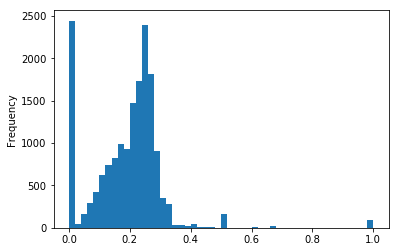

In [32]:
plt.figure()
career.Avg.plot.hist(bins=50)

As expected, there are outliers (.000 batting avg. and 1.000 avg), and the data is a little noisy. Let's filter out all players with fewer than 500 career at-bats and recreate the histogram

In [33]:
career500 = career[career['AB']>=500]
career500.head()

,playerID,AB,H,Avg
1,aaronha01,12364,3771,0.304998
2,aaronto01,944,216,0.228814
7,abbated01,3044,772,0.253614
9,abbeych01,1751,492,0.280982
11,abbotfr01,513,107,0.208577


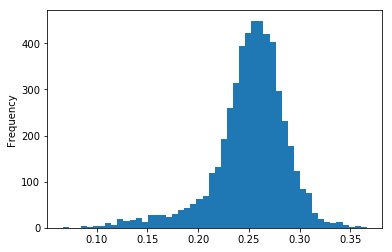

In [35]:
plt.figure(figsize=(6,4))
career500.Avg.plot.hist(bins=50)
plt.savefig('Career_500_hist.png')

Evidently, it appears that some pitchers have logged quite a few at-bats over their careers. I wonder if I can pull positional data from one of the other files in the grand Lahman baseball index. 

In [36]:
pitching = pd.read_csv('./Lahman-2016/core/Pitching.csv')
pitching.describe()

,yearID,stint,W,L,G,GS,CG,SHO,SV,IPouts,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
count,44963.000000,44963.000000,44963.000000,44963.000000,44963.000000,44963.000000,44963.000000,44963.000000,44963.000000,44963.000000,...,30388.000000,44830.000000,44405.000000,44963.000000,44724.000000,44830.000000,44963.000000,12063.000000,12063.000000,12061.000000
mean,1968.670062,1.079643,4.715744,4.715722,23.681761,9.485488,3.151035,0.448591,1.504793,253.872139,...,2.411379,2.528575,2.266096,0.301604,343.312181,6.345260,43.021773,2.141922,1.878388,5.322610
std,37.569499,0.284834,5.813410,4.988846,18.493488,12.283920,7.081844,1.109742,4.991518,257.330446,...,2.772648,3.425706,2.998881,0.755523,348.758261,9.993949,43.245812,2.710191,2.121352,5.990178
min,1871.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1941.000000,1.000000,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,49.000000,...,0.000000,0.000000,0.000000,0.000000,64.000000,0.000000,11.000000,0.000000,0.000000,1.000000
50%,1978.000000,1.000000,2.000000,3.000000,21.000000,3.000000,0.000000,0.000000,0.000000,167.000000,...,2.000000,1.000000,1.000000,0.000000,227.000000,3.000000,28.000000,1.000000,1.000000,3.000000
75%,2001.000000,1.000000,7.000000,8.000000,35.000000,17.000000,3.000000,0.000000,1.000000,393.000000,...,4.000000,4.000000,3.000000,0.000000,535.000000,8.000000,67.000000,3.000000,3.000000,8.000000
max,2016.000000,4.000000,59.000000,48.000000,106.000000,75.000000,75.000000,16.000000,62.000000,2040.000000,...,23.000000,63.000000,41.000000,16.000000,2906.000000,84.000000,519.000000,21.000000,14.000000,40.000000


In [37]:
pitching.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'W', 'L', 'G', 'GS',
       'CG', 'SHO', 'SV', 'IPouts', 'H', 'ER', 'HR', 'BB', 'SO', 'BAOpp',
       'ERA', 'IBB', 'WP', 'HBP', 'BK', 'BFP', 'GF', 'R', 'SH', 'SF', 'GIDP'],
      dtype='object')

In [38]:
pitchers = pitching['playerID'].tolist()
pitchers[:10]

['bechtge01',
 'brainas01',
 'fergubo01',
 'fishech01',
 'fleetfr01',
 'flowedi01',
 'mackde01',
 'mathebo01',
 'mcbridi01',
 'mcmuljo01']

Now I have a list of all the pitchers throughout the recorded history of baseball. I just need to remove the players in my batting stats dataframe whose playerID appear in the pitchers dataframe.

In [39]:
no_pitchers = career500[~career500['playerID'].isin(pitchers)]
# This is a new technique I discovered on stack overflow. Pretty handy! 

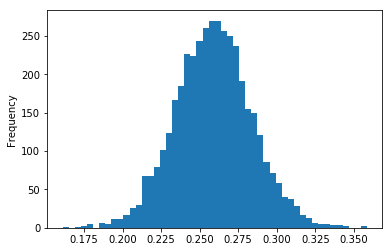

In [40]:
plt.figure(figsize=(6,4))
no_pitchers.Avg.plot.hist(bins=50)
plt.savefig('no_pitchers_hist.png')

In [41]:
print(len(no_pitchers['playerID']))
print(len(career500['playerID']))

4143
5152


Well, that histogram looks pretty good. I think I did an excellent job of sifting through the data to obtain a subset that is roughly equivalent to the example project I'm following. 

From the original project:

___The first step of empirical Bayes estimation is to estimate a beta prior using this data. Estimating priors from the data you’re currently analyzing is not the typical Bayesian approach- usually you decide on your priors ahead of time. There’s a lot of debate and discussion about when and where it’s appropriate to use empirical Bayesian methods, but it basically comes down to how many observations we have: if we have a lot, we can get a good estimate that doesn’t depend much on any one individual. Empirical Bayes is an approximation to more exact Bayesian methods- and with the amount of data we have, it’s a very good approximation.___

I think I can get the hyperparameters for the beta distribution by using scipy. I'm not sure if I need to normalize the data, but I can figure that out if need be. To be perfect to the example project, I need to then compare the beta prior to the actual data. After verifying that it fits well, I can proceed with making batting average predictions using this beta prior and a player's career data. 

In [42]:
from scipy.stats import beta

In [43]:
data = list(no_pitchers['Avg'])

In [44]:
data[:10]

[0.30499838240051763,
 0.2288135593220339,
 0.25361366622864651,
 0.20857699805068225,
 0.26342281879194629,
 0.25587084148727984,
 0.24423963133640553,
 0.22738095238095238,
 0.26877715704531346,
 0.29127358490566035]

In [45]:
alpha0, beta0, _, __ = beta.fit(data, floc=0, fscale=1) # restricting the fit using floc=0, and fscale=1 yields correct result!

In [46]:
print('Alpha nought = ', alpha0)
print('Beta nought = ', beta0)

Alpha nought =  79.1908368768
Beta nought =  226.706768623


Nice! I used scipy to estimate my hyperparameters and got a very similar result to the example project. Now I need to figure out how to plot the beta prior along with my starting histogram.

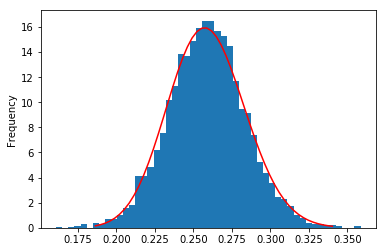

In [48]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
x = np.linspace(beta.ppf(0.001, alpha0, beta0),
               beta.ppf(0.999, alpha0, beta0))
ax.plot(x, beta.pdf(x, alpha0, beta0), 'r-', label='beta pdf')
no_pitchers.Avg.plot.hist(bins=50, normed=True) #note: normed is deprecated, I must have an old version of matplotlib
plt.savefig('hist_with_beta_dist.png')          #the new method is to call density=True
plt.show()                                      

### Bingo! I figured it out! I'm definitely getting more and more comfortable troubleshooting. However, matplotlib and all of it's parameters can trip me up at times! Awesome awesome awesome. I'm getting close to wrapping this piece up. Next is prediction of batting averages using this beta prior. 

In [49]:
career_eb = no_pitchers

In [50]:
career_eb['eb_estimate'] = (career_eb.loc[:,'H'] + alpha0) / (career_eb.loc[:,'AB'] + alpha0 + beta0) 
#yet the above code still worked? I'm not sure why the issue this time, when I have used this before

/Users/charlierock/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [51]:
career['eb_estimate'] = (career.loc[:,'H'] + alpha0) / (career.loc[:,'AB'] + alpha0 + beta0)

/Users/charlierock/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [52]:
career_eb.head(10)

,playerID,AB,H,Avg,eb_estimate
1,aaronha01,12364,3771,0.304998,0.303885
2,aaronto01,944,216,0.228814,0.236172
7,abbated01,3044,772,0.253614,0.254095
11,abbotfr01,513,107,0.208577,0.227368
12,abbotje01,596,157,0.263423,0.261882
14,abbotku01,2044,523,0.255871,0.256263
22,abernbr01,868,212,0.244240,0.248055
28,abnersh01,840,191,0.227381,0.235790
29,abramca01,1611,433,0.268777,0.267198
32,abreubo01,8480,2470,0.291274,0.290146


In [53]:
career_eb.describe()

,AB,H,Avg,eb_estimate
count,4143.000000,4143.000000,4143.000000,4143.000000
mean,2799.986483,752.808351,0.258883,0.260079
std,2174.258164,630.192232,0.024948,0.020949
min,500.000000,90.000000,0.161002,0.178527
25%,1052.500000,264.000000,0.242101,0.245579
50%,2090.000000,533.000000,0.258807,0.258820
75%,4059.500000,1085.000000,0.274731,0.272823
max,14053.000000,4256.000000,0.358497,0.354904


Now to recreate the cool plot at the end of the tutorial. This plot shows how the Empirical Bayes approach "shrinks" the batting average predictions toward historical data. The points that end up closest to the diagonal line are those with the highest number of career at-bats (lots of historical data). I have figured out almost all the matplotlib stuff, but I think the original project created this plot using all data, not just the dataframe cleaned up to get the beta prior. I need to apply empirical bayes to that dataframe. 

In [54]:
career.describe()

,AB,H,Avg,eb_estimate
count,16902.000000,16902.000000,16902.000000,16902.000000
mean,863.220743,225.924683,0.190426,0.249643
std,1673.288918,470.893499,0.119649,0.020921
min,1.000000,0.000000,0.000000,0.127277
25%,14.000000,2.000000,0.125000,0.241914
50%,115.000000,21.000000,0.212924,0.253781
75%,765.000000,177.000000,0.256146,0.258545
max,14053.000000,4256.000000,1.000000,0.363563


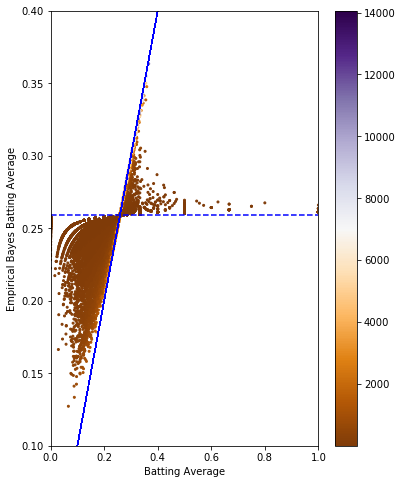

In [55]:
y = alpha0 / (alpha0+beta0)
fig, ax = plt.subplots(1,1,figsize=(6,8))
ax.set_xlabel('Batting Average')
ax.set_ylabel('Empirical Bayes Batting Average')
ax.set_xlim([0, 1])
ax.set_ylim([0.1, .4])
plt.axhline(y=y, color='b', linestyle='--')
plt.plot(career['Avg'], career['Avg'], 'b-', linewidth=0.8) #This plots a diagonal line of y=x, i.e. if they hit exactly to their career data. 
scat = plt.scatter(career['Avg'], career['eb_estimate'], c=career['AB'], cmap='PuOr', s=4)
#adding the colorbar
cbar = plt.colorbar(scat)
plt.savefig('eb_estimates_cbar.png')
plt.show()

Again, from the original blog post:

___The horizontal dashed red line marks y=α0α0+β0=0.259 - that’s what we would guess someone’s batting average was if we had no evidence at all. Notice that points above that line tend to move down towards it, while points below it move up.
  The diagonal red line marks y=x. Points that lie close to it are the ones that didn’t get shrunk at all by empirical Bayes. Notice that they’re the ones with the highest number of at-bats (the brightest orange here): they have enough evidence that we’re willing to believe the naive batting average estimate.
  This is why this process is sometimes called shrinkage: we’ve moved all our estimates towards the average. How much it moves these estimates depends on how much evidence we have: if we have very little evidence (4 hits out of 10) we move it a lot, if we have a lot of evidence (300 hits out of 1000) we move it only a little. That’s shrinkage in a nutshell: Extraordinary outliers require extraordinary evidence.___

### As the original author states, in the background, this could be thought of as a "dumb hack" to approximating future performance but... when anyone asks what you did, remember to call it “empirical Bayesian shrinkage towards a Beta prior.” We statisticians have to keep up appearances! And there you have it. I have recreated this project entirely in Python and it was great practice for me. I got reacquainted with and learned a few tricks in pandas and matplotlib. I'm really pleased with how this turned out. Now time to blog about it!  